Importing the libraries

In [46]:
!pip install mglearn
!pip install xgboost

In [ ]:
!pip install requirements.txt

In [1]:
#libraries
import pandas
import mglearn
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Evaluation Metrics

In [2]:
#Evaluation Metrics
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from scipy.special import boxcox1p
from sklearn.metrics import classification_report, confusion_matrix

Environement Specificaftions 

In [3]:
#Environment Specs
import sys
import scipy

print('Environment specification:\n')
print('python', '%s.%s.%s' % sys.version_info[:3])

for mod in np, scipy, sns, sklearn, pd:
    print(mod.__name__, mod.__version__)

Environment specification:

python 3.9.7
numpy 1.20.3
scipy 1.7.1
seaborn 0.11.2
sklearn 1.0.2
pandas 1.3.4


In [4]:
data = pd.read_csv('voice_data.csv')

In [5]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


* meanfreq: mean frequency of the voice audio of the person (in kHz)
* sd: standard deviation of the frequency of the voice audio
* median: median frequency of the voice audio (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
* kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* meanfun: mean fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: mean of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index

Checking for NULL values

In [6]:
data.isnull().sum()
#data seems to have no null values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Data Frame Shape and Visualization

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [8]:
data.shape

(3168, 21)

In [9]:
print("Total number of labels: {}".format(data.shape[0]))

Total number of labels: 3168


In [10]:
print("Number of male: {}".format(data[data.label == 'male'].shape[0]))
print("Number of female: {}".format(data[data.label == 'female'].shape[0]))

Number of male: 1584
Number of female: 1584


Correlation among Features

<AxesSubplot:>

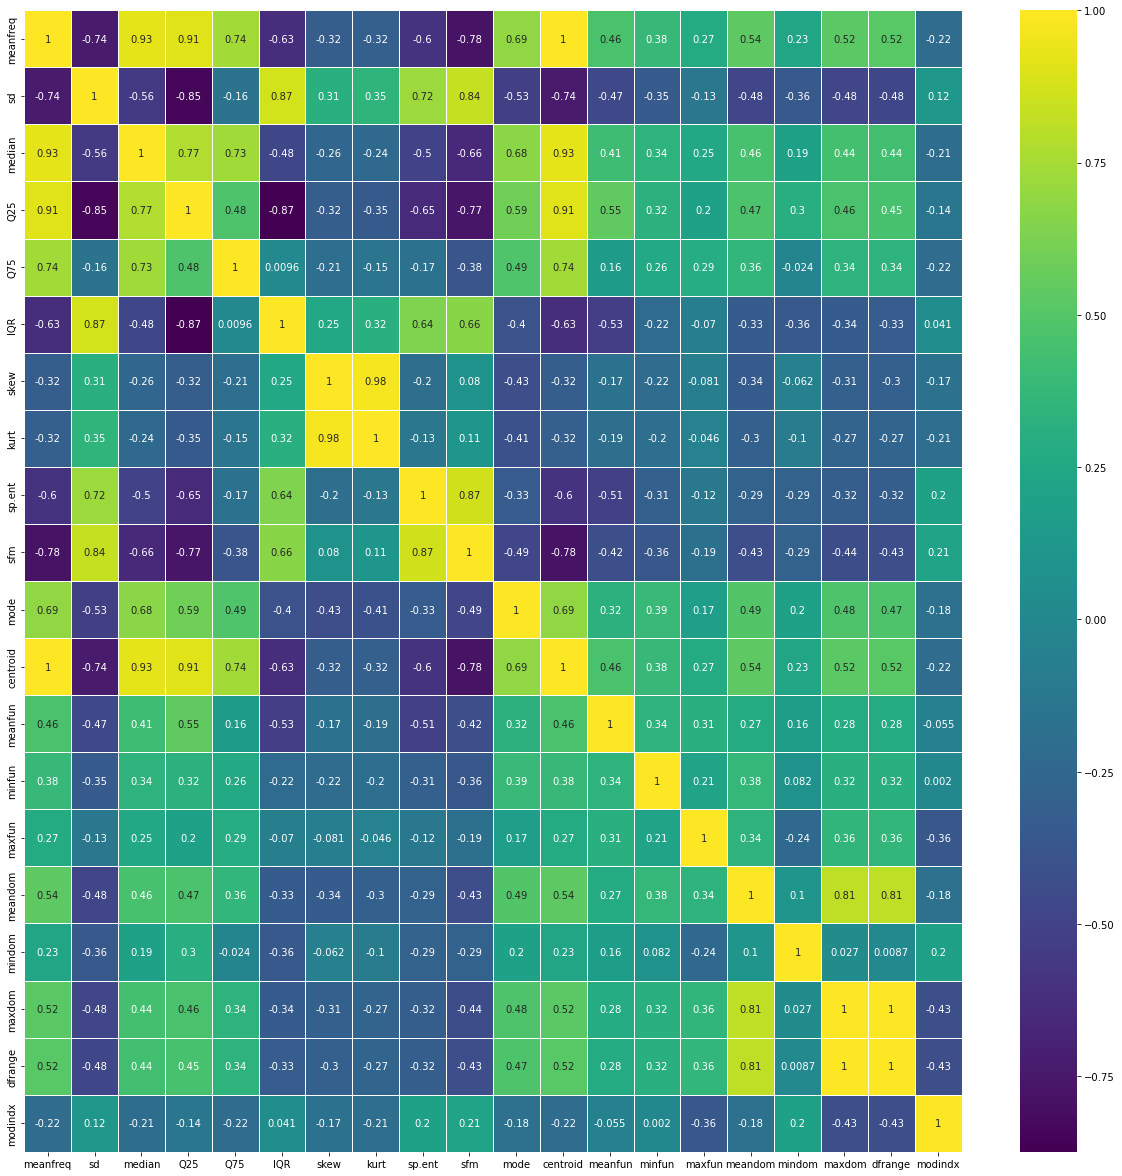

In [11]:
import seaborn
import matplotlib.pyplot as plt
import pandas
# using normal pandas to visualize the data 
df_pandas = pd.read_csv('voice_data.csv')
plt.figure(figsize=(21,21))
seaborn.heatmap(df_pandas.corr(),annot=True,cmap='viridis',linewidth=0.5)

### Kernel Density Estimate Plot 
#### It is analagous to a histogram. It represents the data using a continuous probability density curve.

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

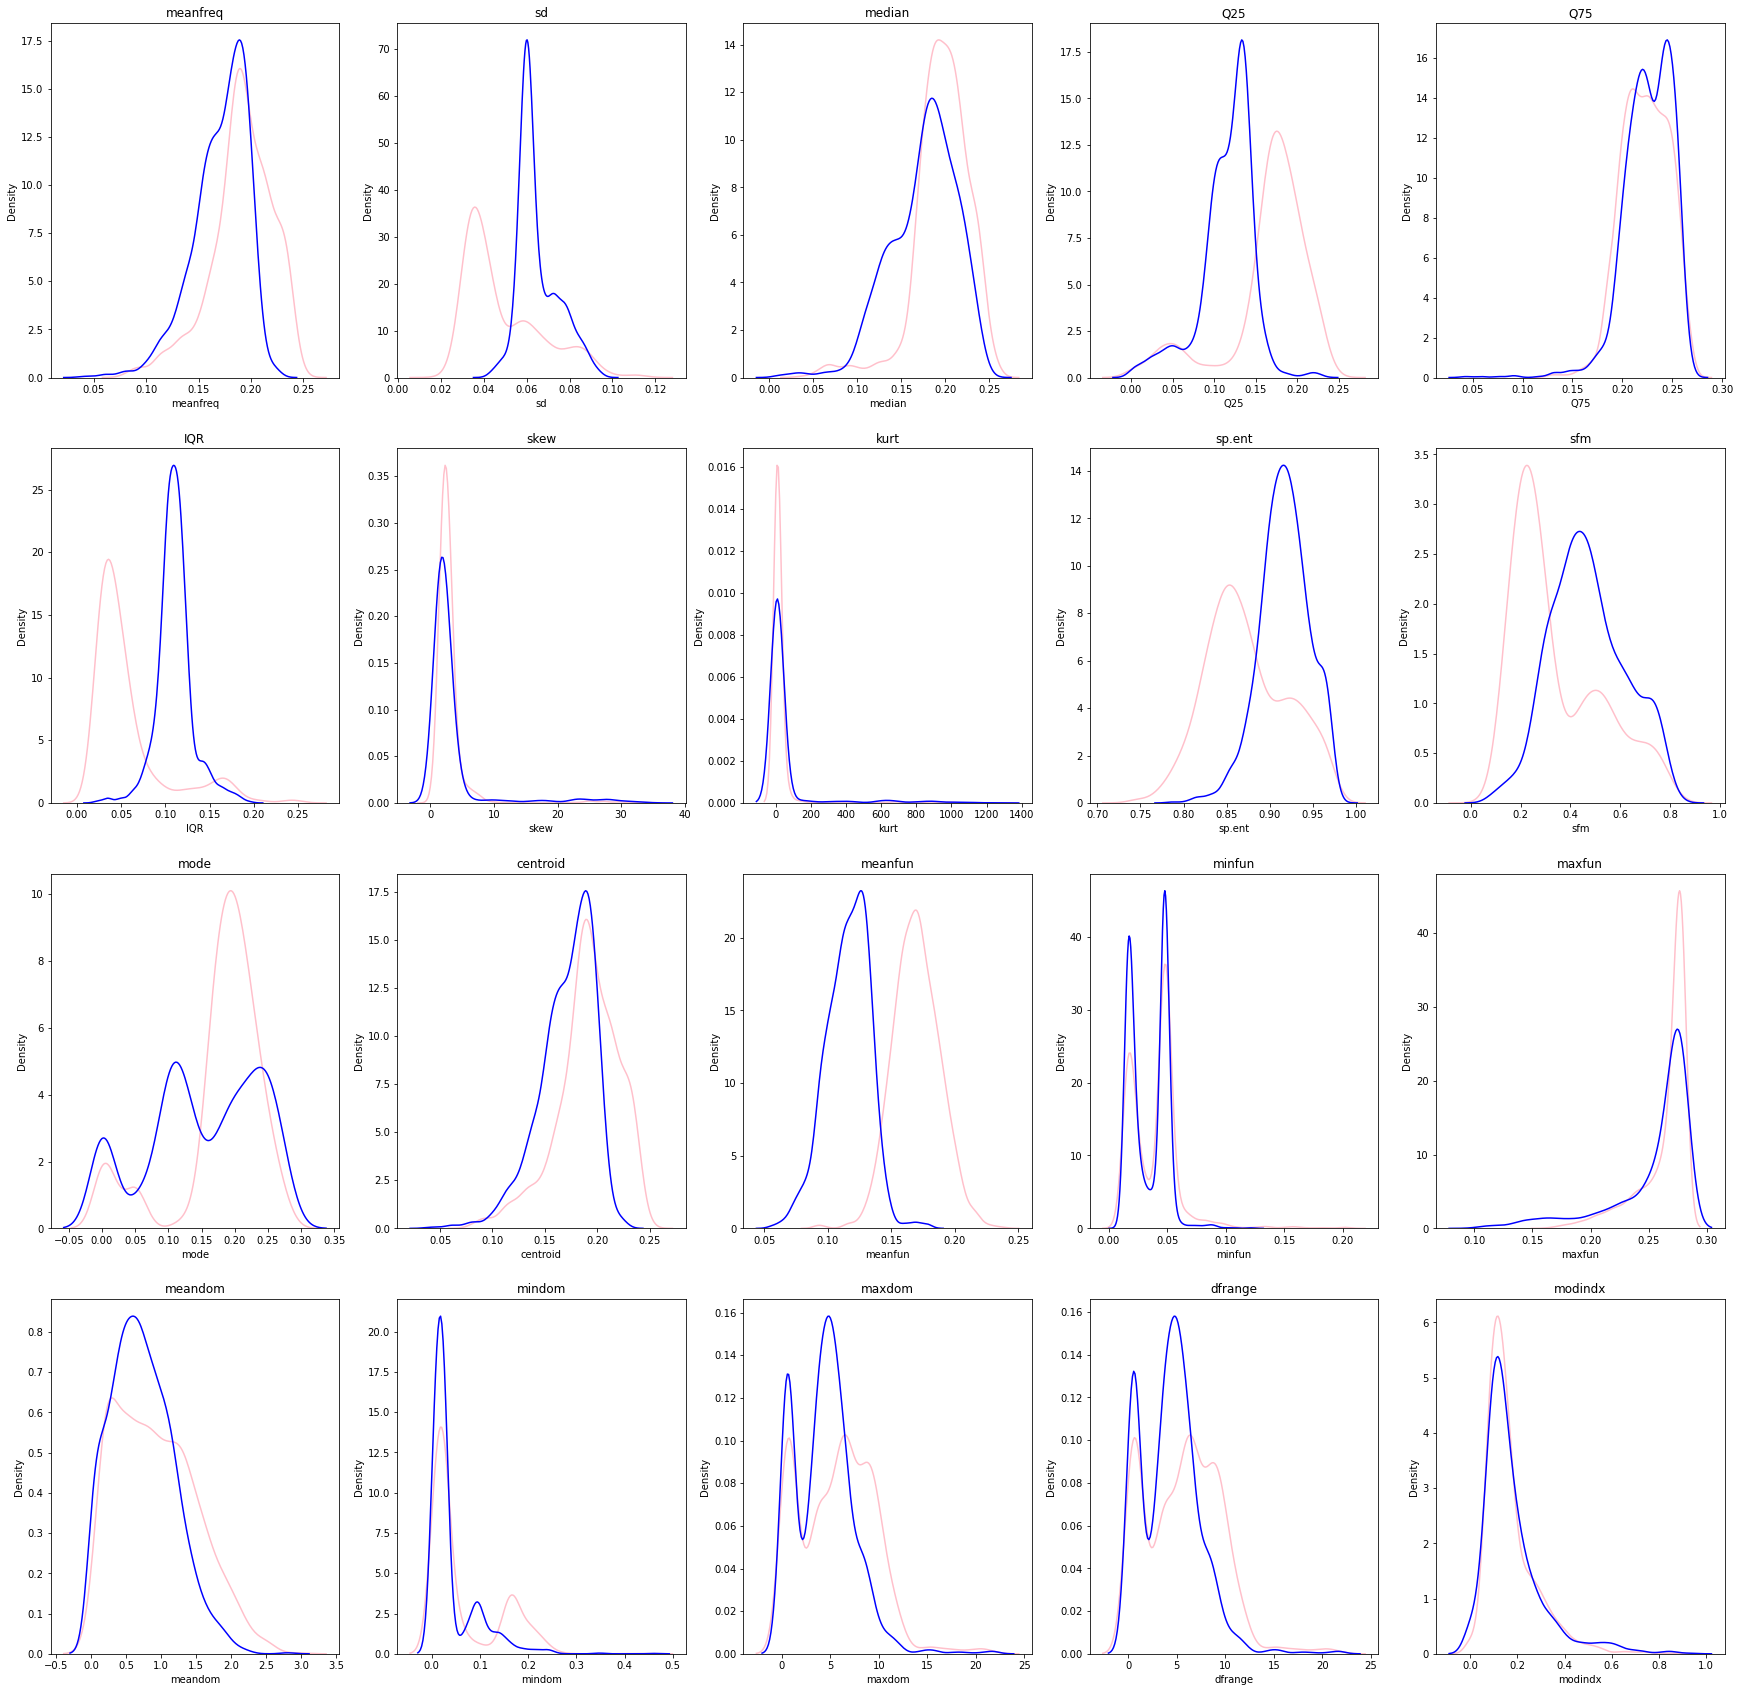

In [12]:
label_encode = LabelEncoder()
# Perform Encoding by coverting 'label' feature into numerical form
df_pandas['label'] = label_encode.fit_transform(df_pandas['label'])
print(df_pandas.head())
from matplotlib import pyplot as plt

plt.subplots(4,5,figsize=(30,30))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df_pandas.columns[i-1])
    sns.kdeplot(df_pandas.loc[df_pandas['label'] == 0, df_pandas.columns[i-1]], color= 'pink', label='female')
    sns.kdeplot(df_pandas.loc[df_pandas['label'] == 1, df_pandas.columns[i-1]], color= 'blue', label='male')

c:\Users\AB\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


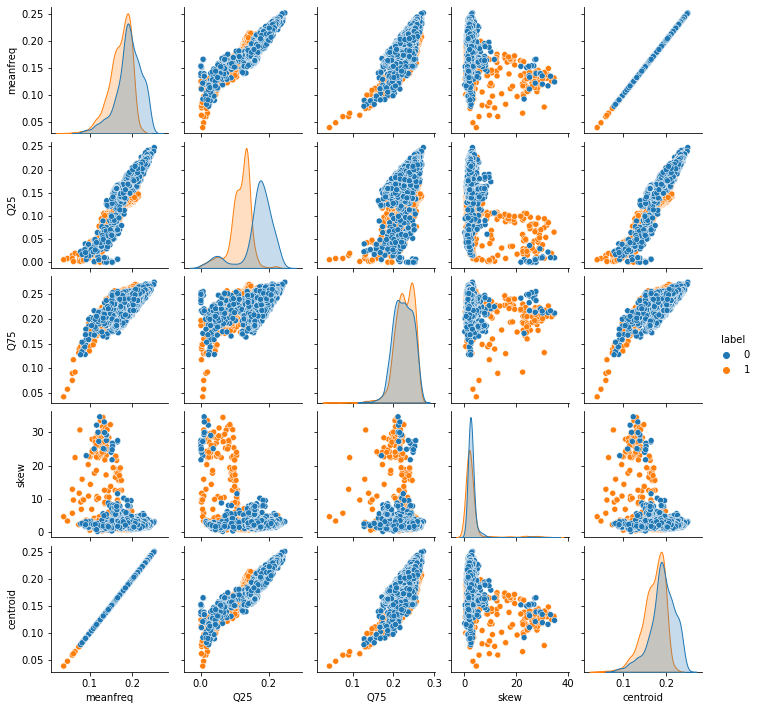

In [13]:
sns.pairplot(df_pandas[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)

In [14]:
import mglearn

#### On analysing the above plots we can conclude that we can drop some features due to high correlation or because of not having great diffrence in male and female data sets. These features are sfm,kurt,meandom,meanfreq,dfrange,modindx

In [15]:
ND = df_pandas.drop(['sfm','kurt','meandom','meanfreq','dfrange','modindx'],axis=1)
ND

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,1
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,1
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,1
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,1
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,0.962934,0.200836,0.131884,0.182790,0.083770,0.262295,0.007812,4.210938,0
3164,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,0.960716,0.013683,0.116221,0.188980,0.034409,0.275862,0.039062,3.679688,0
3165,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,0.946854,0.008006,0.142056,0.209918,0.039506,0.275862,0.007812,2.937500,0
3166,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,0.950436,0.212202,0.143659,0.172375,0.034483,0.250000,0.007812,3.593750,0


In [16]:
new_data = data.drop(['sfm','kurt','meandom','meanfreq','dfrange','modindx'],axis=1)
new_data

,sd,median,Q25,Q75,IQR,skew,sp.ent,mode,centroid,meanfun,minfun,maxfun,mindom,maxdom,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,0.893369,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,male
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,0.892193,0.000000,0.066009,0.107937,0.015826,0.250000,0.007812,0.054688,male
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,0.846389,0.000000,0.077316,0.098706,0.015656,0.271186,0.007812,0.015625,male
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,0.963322,0.083878,0.151228,0.088965,0.017798,0.250000,0.007812,0.562500,male
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,0.971955,0.104261,0.135120,0.106398,0.016931,0.266667,0.007812,5.484375,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,0.962934,0.200836,0.131884,0.182790,0.083770,0.262295,0.007812,4.210938,female
3164,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,0.960716,0.013683,0.116221,0.188980,0.034409,0.275862,0.039062,3.679688,female
3165,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,0.946854,0.008006,0.142056,0.209918,0.039506,0.275862,0.007812,2.937500,female
3166,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,0.950436,0.212202,0.143659,0.172375,0.034483,0.250000,0.007812,3.593750,female


<AxesSubplot:>

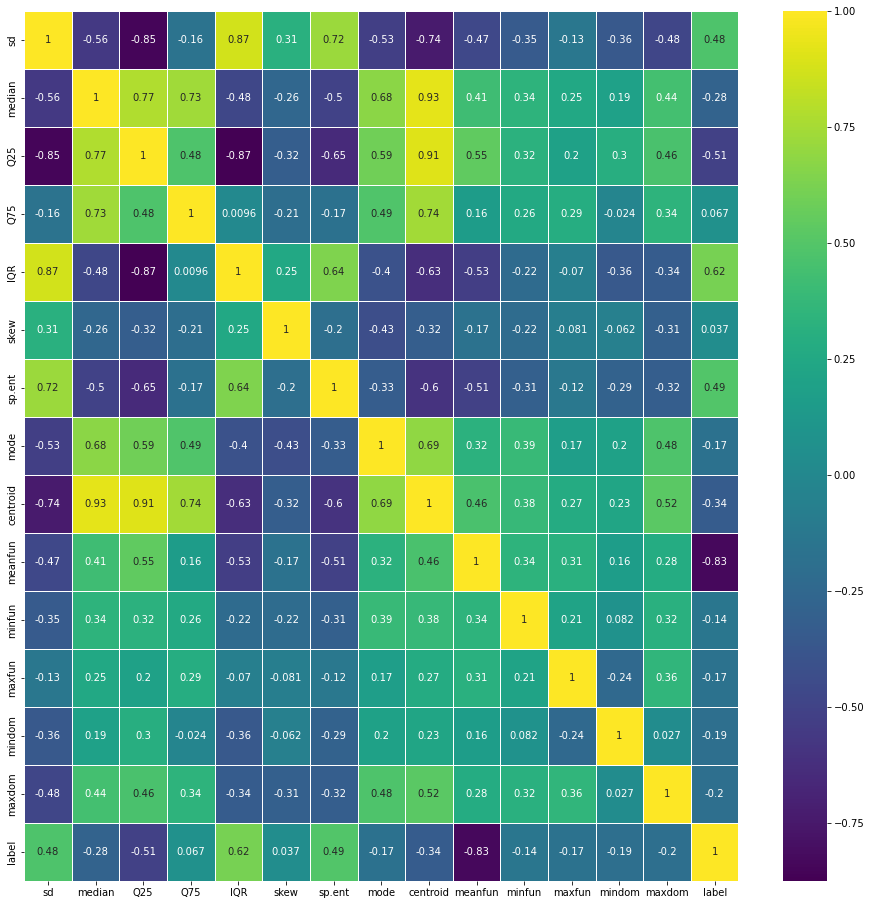

In [17]:
plt.figure(figsize=(16,16))
seaborn.heatmap(ND.corr(),annot=True,cmap='viridis',linewidth=0.5)

#### Relatively less features have high correlation 

### Train , Test and Split the data using cuml.model_selection

In [18]:
new_data['label'] = new_data['label'].map({'male': 1, 'female' : 0})
print(new_data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(new_data.iloc[ : , : -1].values, new_data.iloc[ : ,  -1].values, test_size=0.2 , random_state = 42)


            sd    median       Q25       Q75       IQR       skew    sp.ent  \
0     0.064241  0.032027  0.015071  0.090193  0.075122  12.863462  0.893369   
1     0.067310  0.040229  0.019414  0.092666  0.073252  22.423285  0.892193   
2     0.083829  0.036718  0.008701  0.131908  0.123207  30.757155  0.846389   
3     0.072111  0.158011  0.096582  0.207955  0.111374   1.232831  0.963322   
4     0.079146  0.124656  0.078720  0.206045  0.127325   1.101174  0.971955   
...        ...       ...       ...       ...       ...        ...       ...   
3163  0.084734  0.153707  0.049285  0.201144  0.151859   1.762129  0.962934   
3164  0.089221  0.076758  0.042718  0.204911  0.162193   0.693730  0.960716   
3165  0.095798  0.183731  0.033424  0.224360  0.190936   1.876502  0.946854   
3166  0.090628  0.184976  0.043508  0.219943  0.176435   1.591065  0.950436   
3167  0.092884  0.183044  0.070072  0.250827  0.180756   1.705029  0.938829   

          mode  centroid   meanfun    minfun    max

In [19]:
X_train.shape

(2534, 14)

### Applying different models , to see which one gives the highest accuracy 

In [20]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Random Forrest Classfier 

In [21]:
rf_clf = RandomForestClassifier()

In [22]:
n_samples = 1000
n_features = 10
n_classes = 2

# random forest depth and size
n_estimators = 25
max_depth = 10

rf_clf = RandomForestClassifier( max_depth = max_depth,
              n_estimators = n_estimators,
              random_state  = 0 )
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.96%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999224     1.000000  0.999605     0.999612      0.999606
recall        1.000000     0.999198  0.999605     0.999599      0.999605
f1-score      0.999612     0.999599  0.999605     0.999605      0.999605
support    1287.000000  1247.000000  0.999605  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1287    0]
 [   1 1246]]

Test Result:
Accuracy Score: 98.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.973422    0.987988  0.981073    0.980705      0.981164
recall       0.986532    0.976261  0.981073    0.981397      0.981073
f1-score     0.979933    0.982090  0.981073    0.981011      0.981079
support    297.000000  337.000000  0.981073 

### Using Support Vector Machines Classifier

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score
svm_classifier = SVC(kernel = 'rbf')
svm_classifier.fit(X_train, y_train)

print_score(svm_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(svm_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 72.30%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.730860     0.715075  0.722968     0.722968      0.723092
recall        0.719503     0.726544  0.722968     0.723023      0.722968
f1-score      0.725137     0.720764  0.722968     0.722950      0.722985
support    1287.000000  1247.000000  0.722968  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[926 361]
 [341 906]]

Test Result:
Accuracy Score: 71.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.675758    0.756579  0.714511    0.716168      0.718718
recall       0.750842    0.682493  0.714511    0.716667      0.714511
f1-score     0.711324    0.717629  0.714511    0.714476      0.714675
support    297.000000  337.000000  0.714511  634

### Using KNeighborsCLassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

print_score(classifier2, X_train, y_train, X_test, y_test, train=True)
print_score(classifier2, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.50%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.883212     0.847809  0.865036     0.865511      0.865790
recall        0.846154     0.884523  0.865036     0.865338      0.865036
f1-score      0.864286     0.865777  0.865036     0.865031      0.865020
support    1287.000000  1247.000000  0.865036  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1089  198]
 [ 144 1103]]

Test Result:
Accuracy Score: 75.39%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.726688    0.780186  0.753943    0.753437      0.755125
recall       0.760943    0.747774  0.753943    0.754359      0.753943
f1-score     0.743421    0.763636  0.753943    0.753529      0.754166
support    297.000000  337.000000  0.753943 

### Using SVC, kernel = Linear

In [25]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear')
classifier3.fit(X_train, y_train)

print_score(classifier3, X_train, y_train, X_test, y_test, train=True)
print_score(classifier3, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.974199     0.863830  0.912786     0.919015      0.919886
recall        0.850816     0.976744  0.912786     0.913780      0.912786
f1-score      0.908337     0.916823  0.912786     0.912580      0.912513
support    1287.000000  1247.000000  0.912786  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1095  192]
 [  29 1218]]

Test Result:
Accuracy Score: 93.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.984962    0.904891  0.938486    0.944927      0.942401
recall       0.882155    0.988131  0.938486    0.935143      0.938486
f1-score     0.930728    0.944681  0.938486    0.937705      0.938145
support    297.000000  337.000000  0.938486 

### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)

print_score(classifier5, X_train, y_train, X_test, y_test, train=True)
print_score(classifier5, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 93.21%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.955846     0.909992  0.932123     0.932919      0.933281
recall        0.908314     0.956696  0.932123     0.932505      0.932123
f1-score      0.931474     0.932760  0.932123     0.932117      0.932107
support    1287.000000  1247.000000  0.932123  2534.000000   2534.000000
_______________________________________________
Confusion Matrix: 
 [[1169  118]
 [  54 1193]]

Test Result:
Accuracy Score: 94.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.945392    0.941349  0.943218    0.943371      0.943243
recall       0.932660    0.952522  0.943218    0.942591      0.943218
f1-score     0.938983    0.946903  0.943218    0.942943      0.943193
support    297.000000  337.000000  0.943218 

### Using Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy')
classifier6.fit(X_train, y_train)

print_score(classifier6, X_train, y_train, X_test, y_test, train=True)
print_score(classifier6, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1287.0  1247.0       1.0     2534.0        2534.0
_______________________________________________
Confusion Matrix: 
 [[1287    0]
 [   0 1247]]

Test Result:
Accuracy Score: 96.21%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.941748    0.981538  0.962145    0.961643      0.962898
recall       0.979798    0.946588  0.962145    0.963193      0.962145
f1-score     0.960396    0.963746  0.962145    0.962071      0.962177
support    297.000000  337.000000  0.962145  634.000000    634.000000
_________________________________

### XGBoost Classifier

In [28]:
import xgboost

In [29]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [30]:
xgb1.fit(X_train,y_train)

print_score(xgb1, X_train, y_train, X_test, y_test, train=True)
print_score(xgb1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1287.0  1247.0       1.0     2534.0        2534.0
_______________________________________________
Confusion Matrix: 
 [[1287    0]
 [   0 1247]]

Test Result:
Accuracy Score: 98.58%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.976821    0.993976  0.985804    0.985399      0.985940
recall       0.993266    0.979228  0.985804    0.986247      0.985804
f1-score     0.984975    0.986547  0.985804    0.985761      0.985811
support    297.000000  337.000000  0.985804  634.000000    634.000000
_________________________________

### Voice Based Gender Classification using Tensorflow

In [76]:
X = df_pandas.drop(["label"], axis = 1)
y = df_pandas.label.values

#Normalizing X

X = (X - X.min()) / (X.max() - X.min())

print(X.shape)
print(y.shape)

(3168, 20)
(3168,)


Making train and test data for model training 

In [77]:
from sklearn.model_selection import train_test_split

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size = 0.2, random_state=42)

y_train_nn = y_train.reshape(-1,1)
y_test_nn = y_test.reshape(-1,1)

print(X_train_nn.shape)
print(y_train_nn.shape)
print(X_test_nn.shape)
print(y_test_nn.shape)

(2534, 20)
(2534, 1)
(634, 20)
(634, 1)


Importing tensorflow 

In [78]:
import tensorflow
import tensorflow.keras as keras 

Building a simple Multilayer NN for Classification with Tensorflow

In [79]:
model = keras.Sequential([keras.layers.InputLayer(input_shape=X_train.shape[1:]),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dropout(0.2),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
                         ])

Model Summary

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                

In [81]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

Setting the Hyper Parameters

In [82]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

v_split= 0.2
epoch = 50

Fitting the model

In [83]:
history = model.fit(X_train, y_train, validation_split = v_split , epochs =epoch, callbacks=[reduce_lr])

Epoch 1/50
64/64 [==============================] - 1s 7ms/step - loss: 0.6170 - accuracy: 0.6991 - val_loss: 0.4431 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 0.3489 - accuracy: 0.8811 - val_loss: 0.1711 - val_accuracy: 0.9290 - lr: 0.0010
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 0.1875 - accuracy: 0.9334 - val_loss: 0.1180 - val_accuracy: 0.9665 - lr: 0.0010
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9581 - val_loss: 0.1038 - val_accuracy: 0.9566 - lr: 0.0010
Epoch 5/50
64/64 [==============================] - 0s 4ms/step - loss: 0.1162 - accuracy: 0.9610 - val_loss: 0.0802 - val_accuracy: 0.9744 - lr: 0.0010
Epoch 6/50
64/64 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9620 - val_loss: 0.0798 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 0.1015 - a

Visualizing the Model's Performance 

        loss  accuracy  val_loss  val_accuracy     lr
0   0.617020  0.699063  0.443130      0.875740  0.001
1   0.348871  0.881105  0.171100      0.928994  0.001
2   0.187517  0.933399  0.118043      0.966469  0.001
3   0.133418  0.958066  0.103819      0.956608  0.001
4   0.116209  0.961026  0.080209      0.974359  0.001
5   0.113662  0.962013  0.079795      0.978304  0.001
6   0.101452  0.965960  0.073132      0.972387  0.001
7   0.102375  0.968426  0.067635      0.974359  0.001
8   0.095425  0.971386  0.104464      0.964497  0.001
9   0.102033  0.966946  0.062309      0.976331  0.001
10  0.096731  0.970893  0.073090      0.976331  0.001
11  0.099467  0.967440  0.065312      0.980276  0.001
12  0.094392  0.969413  0.058676      0.976331  0.001
13  0.087335  0.971880  0.076682      0.974359  0.001
14  0.092479  0.970893  0.065171      0.978304  0.001
15  0.083670  0.975826  0.054407      0.982249  0.001
16  0.080972  0.975826  0.061098      0.976331  0.001
17  0.082187  0.971880  0.05

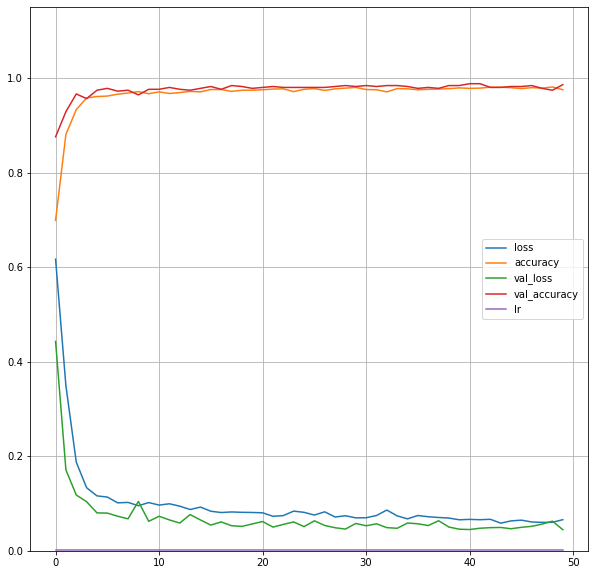

In [84]:
history_df = pandas.DataFrame(history.history)
print(history_df)
history_df.plot(figsize=(10,10) )

plt.grid(True)
plt.gca().set_ylim(0,1.15)
plt.show()

### Testing on New Data.


In [32]:
X_test = pd.DataFrame(X_test)

In [47]:
ab = pd.read_csv('male_voice.csv')
ab

,Unnamed: 0,sound.files,selec,duration,meanfreq,sd,median,Q25,Q75,IQR,...,centroid,peakf,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,1,brian.wav,0,20,0.181215,0.059455,0.176778,0.140711,0.229811,0.0891,...,0.181215,0,0.137074,0.043278,0.279114,1.036896,0,4.155908,4.155908,0.130956


In [49]:
ab = ab[['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom']]

In [50]:
male_test = ab.iloc[0]
b = np.asarray(male_test)
b = b.reshape(1,-1)
p = rf_clf.predict(b)

In [51]:
if (p[0] == 1):
    print("El Hombre")
else:
    print("Un Mujer")

El Hombre


### Testing on Female Data.

In [52]:
female_test = pd.read_csv('female_voice.csv')
female_test = female_test[['sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'sp.ent', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'mindom', 'maxdom']]

In [53]:
female_test = female_test.iloc[0]
c = np.asarray(female_test)
c = c.reshape(1,-1)
p = rf_clf.predict(c)

In [54]:
if (p[0] == 1):
    print("El Hombre")
else:
    print("Un Mujer")

Un Mujer
